In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement :**
To analyze the Netflix data and generate the insight on what type of TV shows / Movies to produce and how to grow the bussiness across the different countries.

Basic Metrix and Data Structure

In [46]:
n = pd.read_csv('netflix.csv')

In [47]:
n.shape

(8807, 12)

There are total 8807 rows and 12 columns

In [48]:
n.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
n.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [50]:
n.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [51]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
n.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


converting dtypes

In [53]:
n['date_added'] = pd.to_datetime(n['date_added'], errors='coerce')
n['type'] = n['type'].astype('category')
n['rating'] = n['rating'].astype('category')
n.dtypes

,0
show_id,object
type,category
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,category
duration,object


In [54]:
n['year_added'] = n['date_added'].dt.year
n['month_added'] = n['date_added'].dt.month
n['month_name_added'] = n['date_added'].dt.month_name()
n.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,September


**Checking Nulls and Duplicates**

In [55]:
n.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [56]:
n.duplicated().sum()

np.int64(0)

**Handlling nulls**

In [57]:
n['country'] = n['country'].fillna(n['country'].mode()[0])
n['cast'].replace(np.nan, 'No Data',inplace = True)
n['director'].replace(np.nan, 'No Data',inplace = True)

n.dropna(inplace = True)
n.drop_duplicates(inplace = True)

/tmp/ipython-input-57-988981994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n['cast'].replace(np.nan, 'No Data',inplace = True)
/tmp/ipython-input-57-988981994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [1]:
n.isna().sum()

NameError: name 'n' is not defined

**statistical summary**

In [59]:
n.describe()

,date_added,release_year,year_added,month_added
count,8702,8702.000000,8702.000000,8702.000000
mean,2019-05-23 17:46:40.735463168,2014.196736,2018.889681,6.654217
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-24 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.829530,1.567252,3.430974


In [ ]:
stat_summary_object = n.describe(include = 'object')
stat_summary_object

,show_id,title,director,cast,country,duration,listed_in,description,month_name_added
count,8702,8702,8702,8702,8702,8702,8702,8702,8702
unique,8702,8702,4523,7602,745,219,509,8671,12
top,s8807,Zubaan,No Data,No Data,United States,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",July
freq,1,1,2538,817,3601,1789,362,4,819


 Numeric (Release Year)
Range: 1925 – 2021

Median: 2017

75% after 2013, indicating significant recent content growth.

Object/Categorical Summary Highlights
Most common country: United States

Most frequent duration: 1 Season (mostly TV shows)

Most common genre combo: “Dramas, International Movies”


---



**Non-Graphical Analysis:** Value counts and unique attributes ​​

In [60]:
n['type'].value_counts()

,count
type,
Movie,6126
TV Show,2576


there are total 6126 movies and 2576 tv shows in this data set

In [61]:
n['country'].value_counts()

,count
country,
United States,3601
India,971
United Kingdom,403
Japan,240
South Korea,195
...,...
"Italy, Belgium",1
"United Kingdom, Hungary, Australia",1
"Canada, Australia",1


the united states , indi , UK ,japan and suth korea are the top 5 countries from where the tv shows and movies are.

In [62]:
n['rating'].value_counts()

,count
rating,
TV-MA,3183
TV-14,2133
TV-PG,838
R,799
PG-13,490
TV-Y7,330
TV-Y,300
PG,287
TV-G,212


TV-MA	,TV-14 , TV-PG are the top 3 rationgs

In [63]:
n['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Classic & Cult TV, TV Sci-Fi & Fantasy",1
"Action & Adventure, Romantic Movies, Sci-Fi & Fantasy",1
"Comedies, Dramas, Sports Movies",1


most of the movies/shows are listed in Dramas and international movies followed by documentaries and stand-up comedy

In [64]:
n['release_year'].value_counts().sort_index()

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1014
2018,1140
2019,1030


the Release Year Range is: (1925, 2021)

In [65]:
n['country'].nunique()

745

there are total 745 unique countries

In [66]:
n['cast'].nunique()

7602

there is total 7602 unique cast combination

In [67]:
n['director'].nunique()

4523

there are 4523 unique directors

In [68]:
n['listed_in'].nunique()

509

there are total 509 genre combination in which movies or tv shows are listed in

In [70]:
#top geners
n['genre'] = n['listed_in'].str.split(', ')
genre_df = n.explode('genre')

# Unique genres
unique_genres = genre_df['genre'].nunique()
print(f"Number of unique genres: {unique_genres}")

# Top 10 genres
top_genres = genre_df['genre'].value_counts().head(10)
print(top_genres)

Number of unique genres: 42
genre
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1327
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [71]:
n['release_year'].nunique()

74

there are toal 74 unique years during which movies/show was relased

---



**Pre-Proccecing**
unnesting the columns like listed_in, cast,director,country

In [72]:
# unnesting the listed_in to genre_list
n['genre_list'] = n['listed_in'].str.split(', ')
genre_df = n.explode('genre_list')


In [73]:
# unnesting the cast to cast_list
n['cast_list'] = n['cast'].str.split(', ')
cast_df = n.explode('cast_list')
cast_df = cast_df[cast_df['cast_list'] != '']  # remove empty entries

In [74]:
# unnesting the director to director_list
n['director_list'] = n['director'].str.split(', ')
director_df = n.explode('director_list')
director_df = director_df[director_df['director_list'] != '']  # remove empty entries

In [75]:
# unnesting the country to country_list
n['country_list'] = n['country'].str.split(', ')
country_df = n.explode('country_list')
country_df = country_df[country_df['country_list'] != '']  # remove empty entries

**Visual Analysis** - Univariate

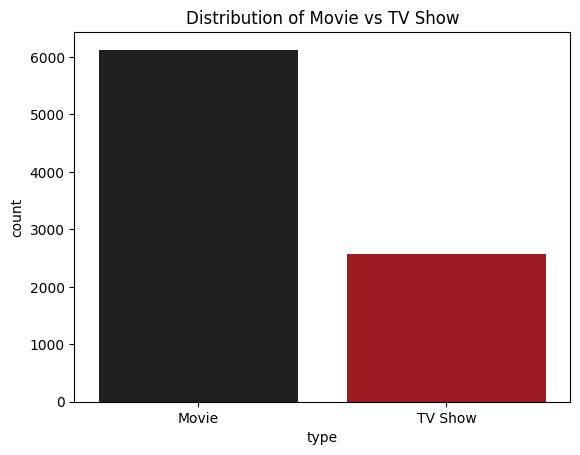

In [76]:
#Distribution of Movie vs TV Show
sns.countplot(data=n, x='type', hue='type',palette=['#221f1f', '#b20710']) # Added palette for different colors
plt.title('Distribution of Movie vs TV Show')
plt.show()

from the graph we can say that the distribution of the movies is more than the tv show in the dataset with movies more than 6000 abnd tv show with more thann 2500, its indicating a focus on film content on Netflix.

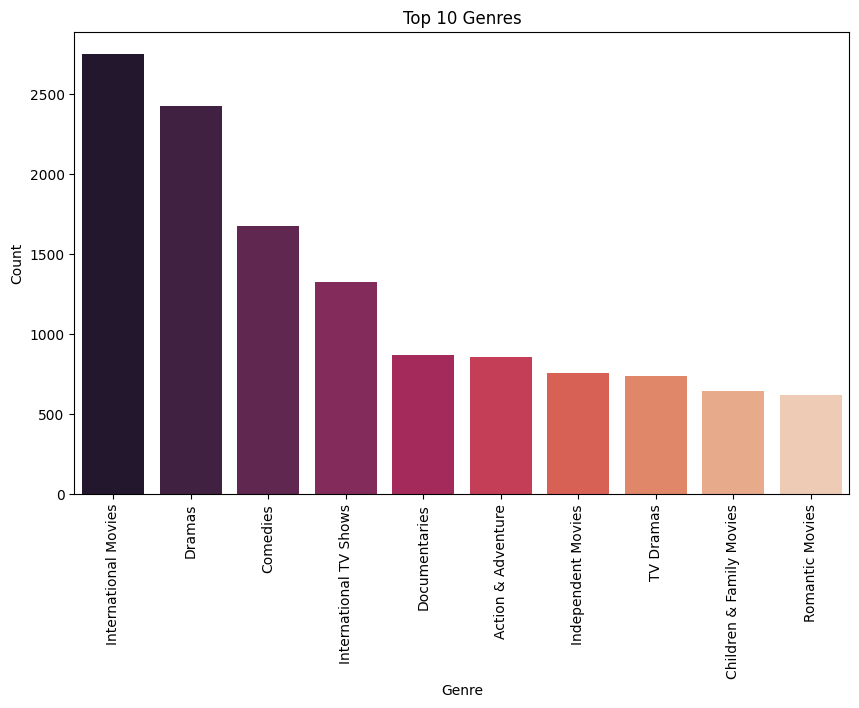

In [77]:
# top 10 genres
top_genres = genre_df['genre_list'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values ,hue=top_genres.index,palette='rocket')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.show()

the international movies, dramas and comedies are among the top 3 genes where the movies/show are listed in

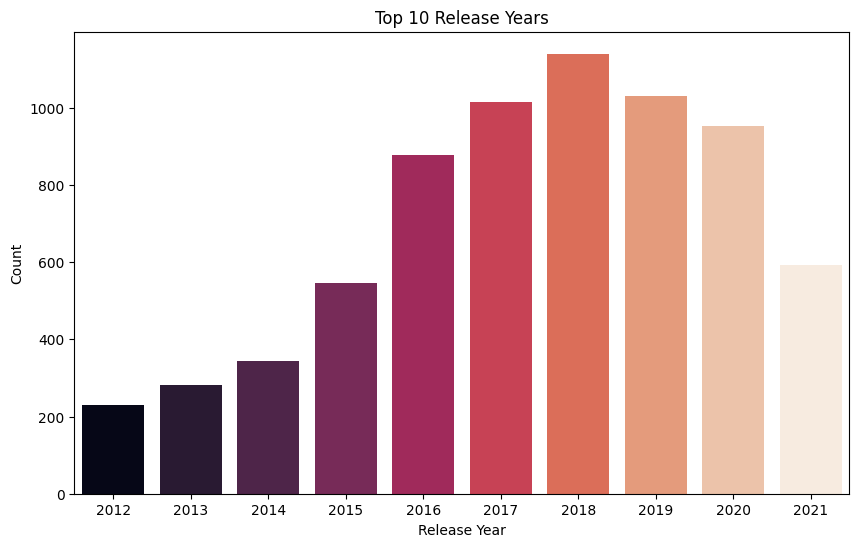

In [78]:
# top 10 release years
top_release_years = n['release_year'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_release_years.index, y=top_release_years.values, hue=top_release_years.index, palette='rocket', legend=False)
plt.title('Top 10 Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

from graph we can say that most of the movies/shows are released between year 2012 - 2021, with 2018 the year in which the max no. of movies/show i.e more than 1000 where released

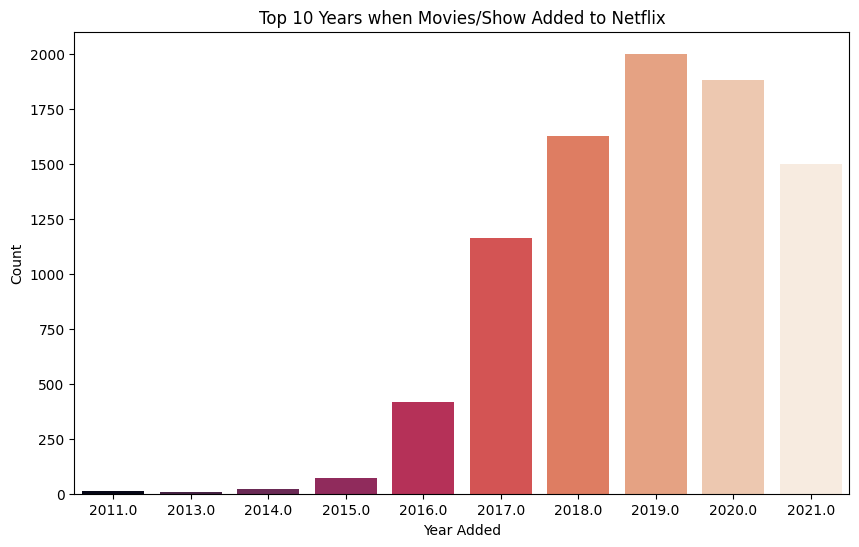

In [79]:
# top 10 years when movies/show added to netflix
top_year_add = n['year_added'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_year_add.index, y=top_year_add.values, hue=top_year_add.index, palette='rocket', legend=False)
plt.title('Top 10 Years when Movies/Show Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

we can say that from the year 2014 onwards the most of no. of moives/show were added to the netflix, with 2019 is the year when the max no. of movies/ show added in the netflix.

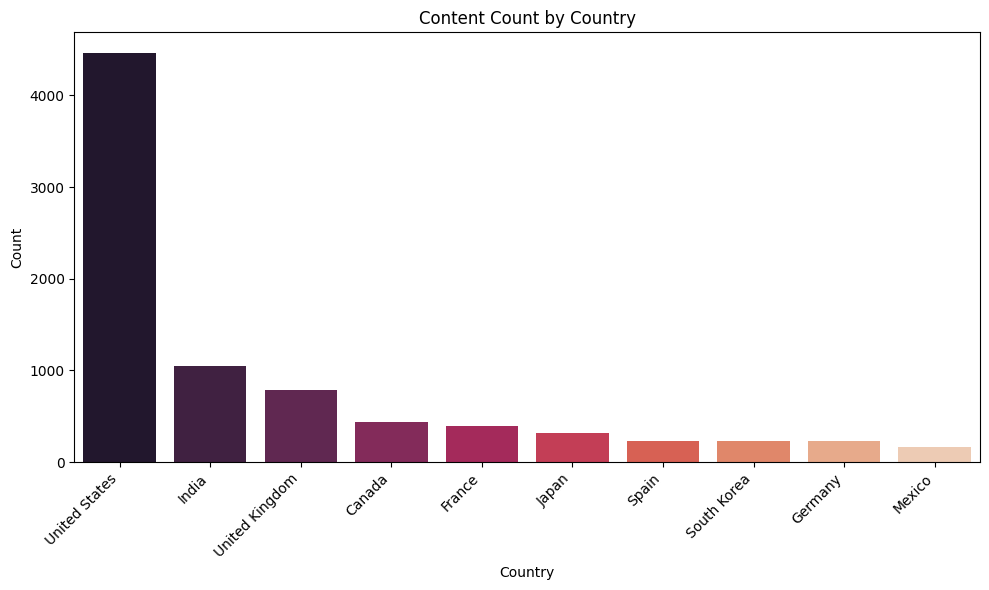

In [80]:
# top 10 country from where the most content is
country_counts = country_df['country_list'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='rocket', legend=False)
plt.title('Content Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

the USA, India and uk are among the top 3 country from where the most of the content is with usa more than 4000,This bar chart displays the countries with the most content on Netflix. The United States is by far the leader, followed by India and the UK, highlighting the major markets for Netflix content.

**Visual Analysis** - Bivariate

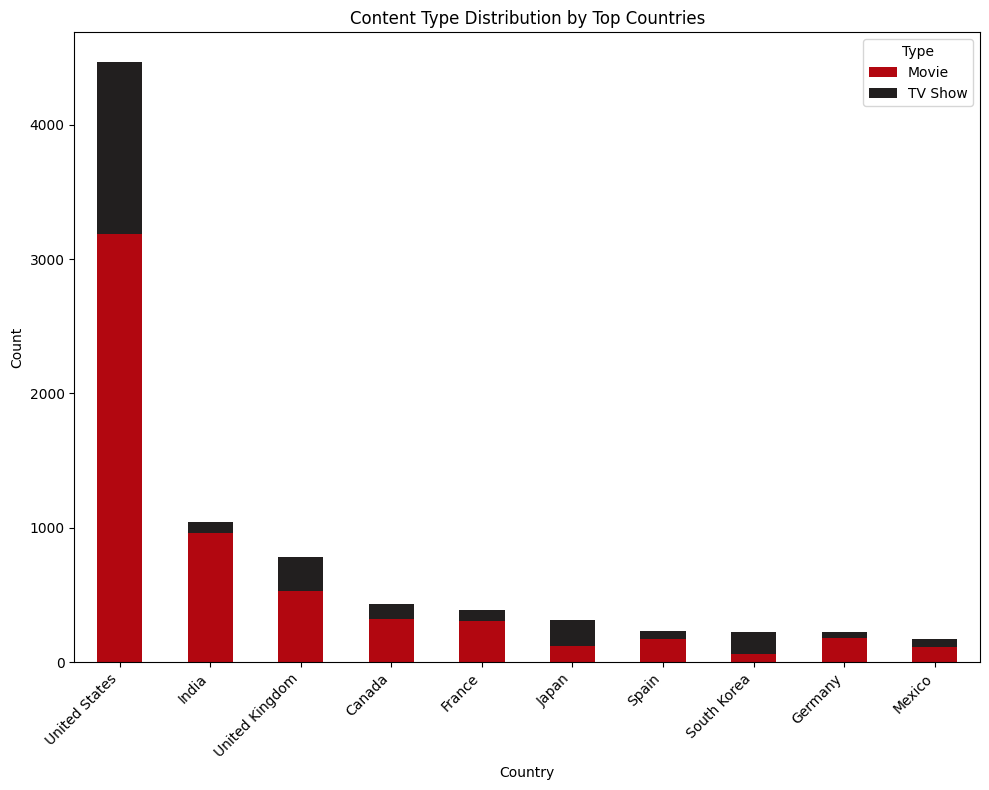

In [81]:
#Type of Content vs. Country
country_type_counts = country_df.groupby('country_list')['type'].value_counts().unstack().fillna(0)

top_countries = country_df['country_list'].value_counts().head(10).index
country_type_counts_top = country_type_counts.loc[top_countries]

country_type_counts_top.plot(kind='bar', stacked=True, figsize=(10, 8), color=['#b20710','#221f1f'])
plt.title('Content Type Distribution by Top Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

USA , india and UK are the contries where most content type is movies with tv show less in india and in japan and korea the most content type is tv show.

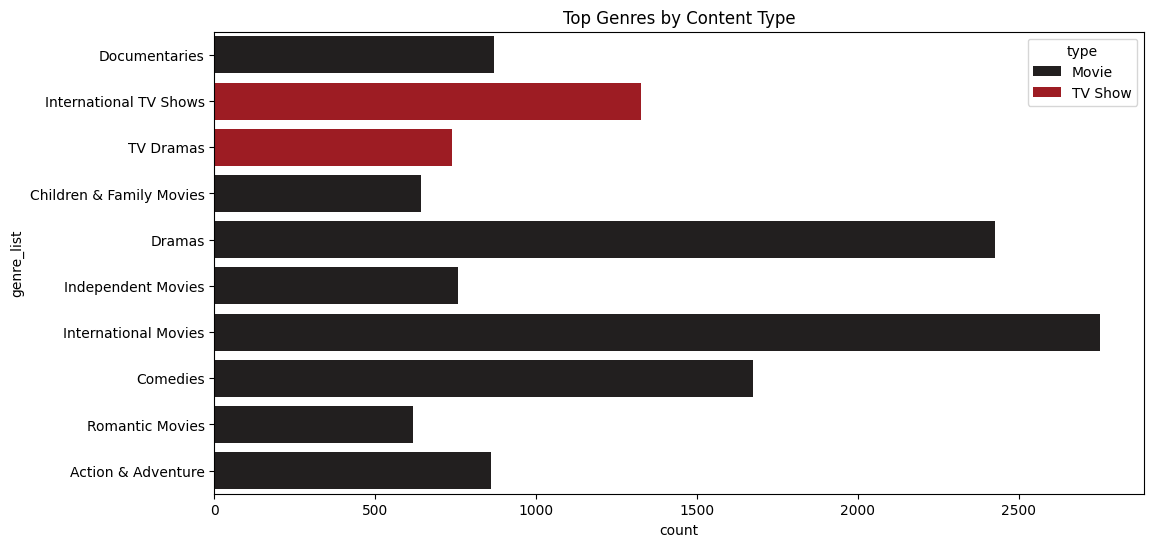

In [82]:
#Top Genres by Content Type
plt.figure(figsize=(12, 6))
top_genres = genre_df['genre_list'].value_counts().head(10).index
sns.countplot(data=genre_df[genre_df['genre_list'].isin(top_genres)], y='genre_list', hue='type',palette=['#221f1f', '#b20710'])
plt.title("Top Genres by Content Type")
plt.show()


by tv show content type the top genres is international tv show followed by TV dramas and in movies content type the international movies,dramas and comedies are the top 3 genres among all others.

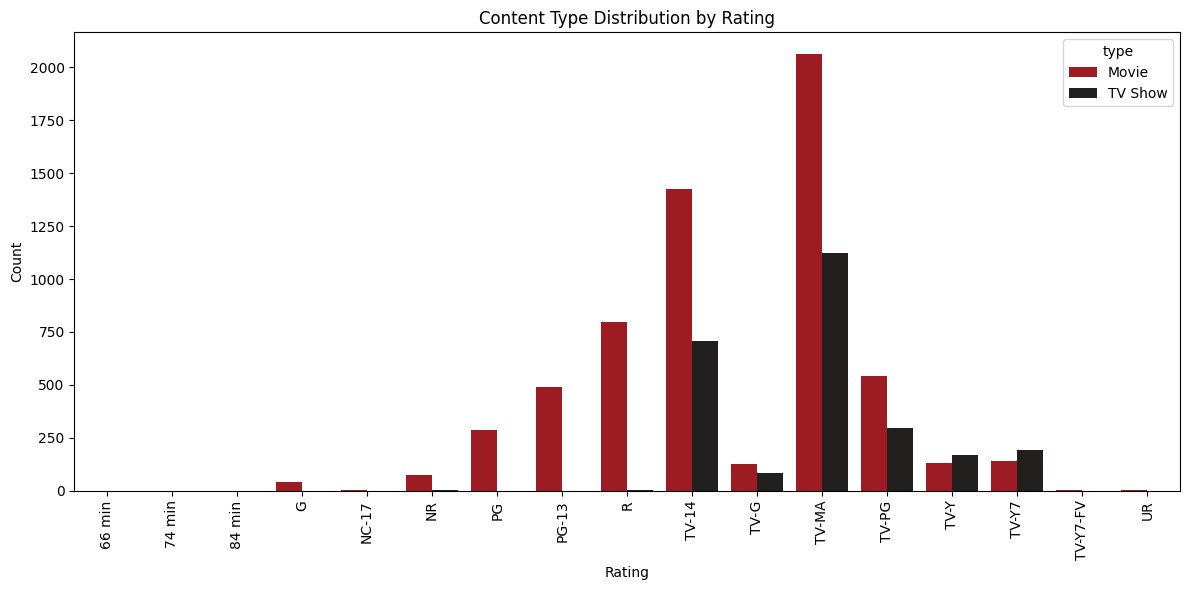

In [83]:
# content type distribution by rating
plt.figure(figsize=(12, 6))
sns.countplot(data=n, x='rating', hue='type', palette=['#b20710', '#221f1f'])
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

the TV-MA is the top rating in movies/show followed by the TV-14 and TV-PG.and the plot indicates how Movies and TV Shows are distributed within these rating categories.

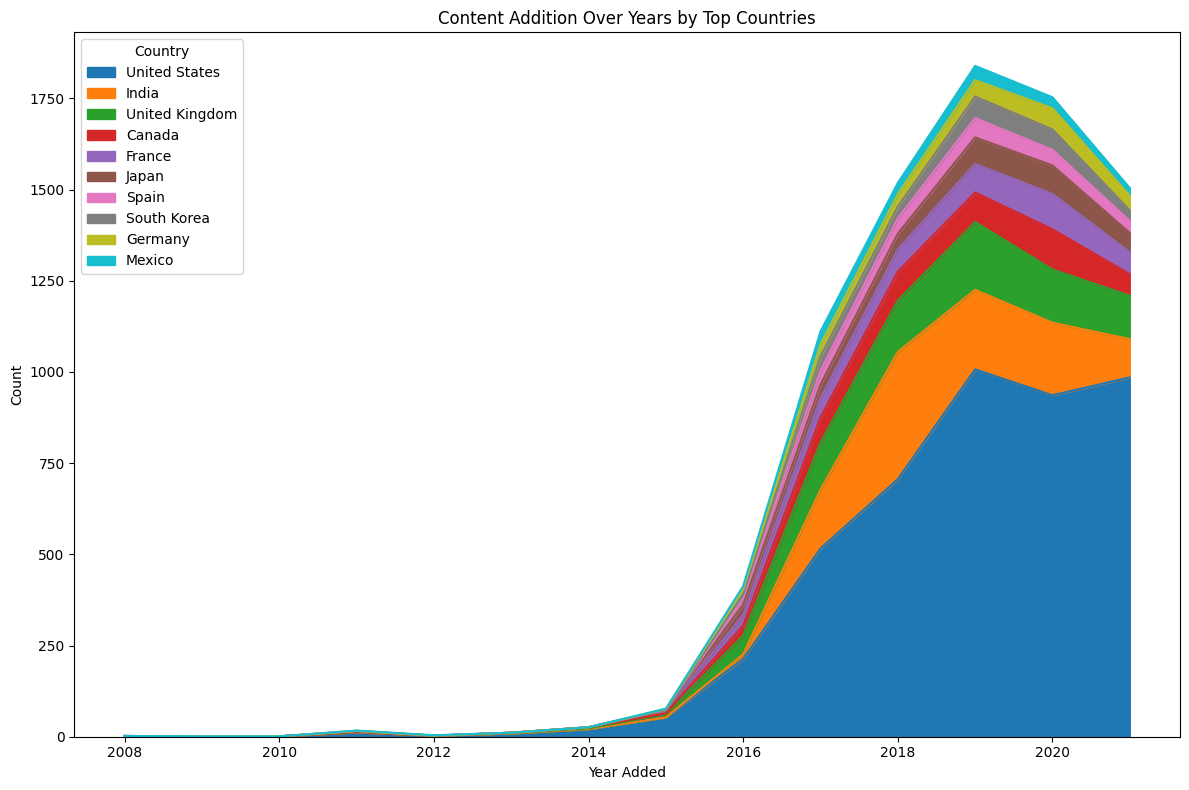

In [84]:
# the years when the most content is added to the netflix top 10 country
#Reveal expansion into new countries or markets.
# Year Added vs. Country (Top 10 Countries)
year_country_counts = country_df.groupby('year_added')['country_list'].value_counts().unstack().fillna(0)
top_countries = country_df['country_list'].value_counts().head(10).index
year_country_counts_top = year_country_counts[top_countries]

year_country_counts_top.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Content Addition Over Years by Top Countries')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


We can see the trend of content added over the years for the top 10 countries.
The USA consistently adds a large amount of content, with a peak around 2019.
India also shows a significant increase in content added around the same period.
Other countries like the UK, Canada, and Japan also show their content addition trends over time.

This area plot visualizes the cumulative content added over the years for the top countries. It clearly demonstrates the rapid expansion of content from the USA and India, particularly in recent years, showing their importance in Netflix's content library growth.

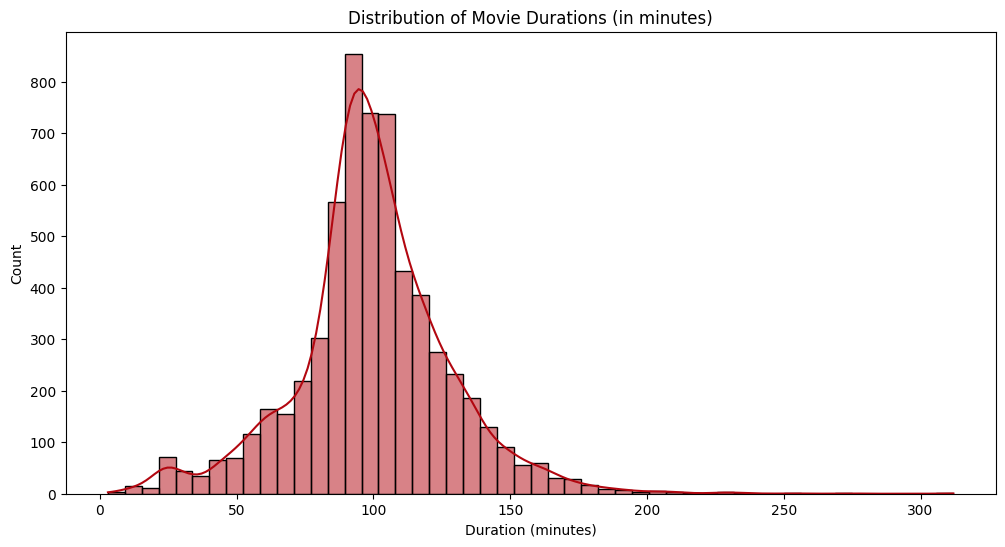

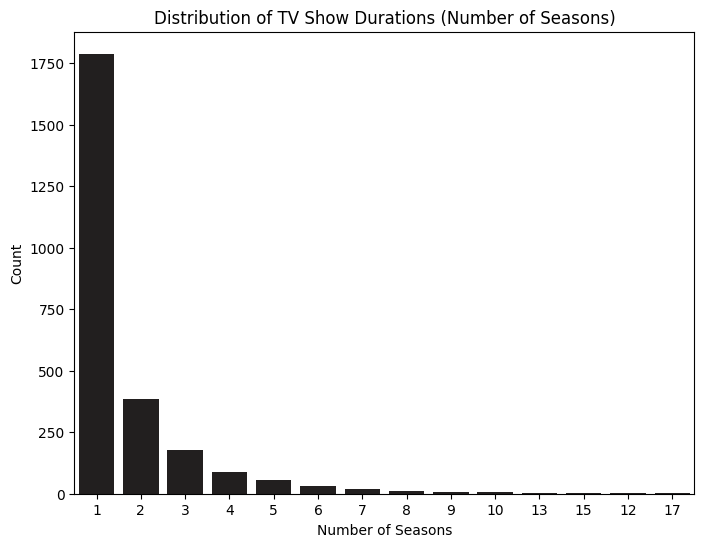

In [85]:
# Duration vs. Type
# For movies, extract the numeric part of the duration using regex
n_movies = n[n['type'] == 'Movie'].copy()
n_movies['duration_numeric'] = n_movies['duration'].str.extract('(\d+)').astype(int)

# For TV shows, extract the numeric part of the duration (number of seasons) using regex
n_tvshows = n[n['type'] == 'TV Show'].copy()
n_tvshows['duration_numeric'] = n_tvshows['duration'].str.extract('(\d+)').astype(int)

# Plot for Movies
plt.figure(figsize=(12, 6))
sns.histplot(data=n_movies, x='duration_numeric', bins=50, kde=True, color='#b20710')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Plot for TV Shows
plt.figure(figsize=(8, 6))
sns.countplot(data=n_tvshows, x='duration_numeric', color='#221f1f', order=n_tvshows['duration_numeric'].value_counts().index)
plt.title('Distribution of TV Show Durations (Number of Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

the most of the movies time duration in minute is between 80 - 130 minute.
the maximum of the tv shows have 1 seasons with some having 2,3 and so on



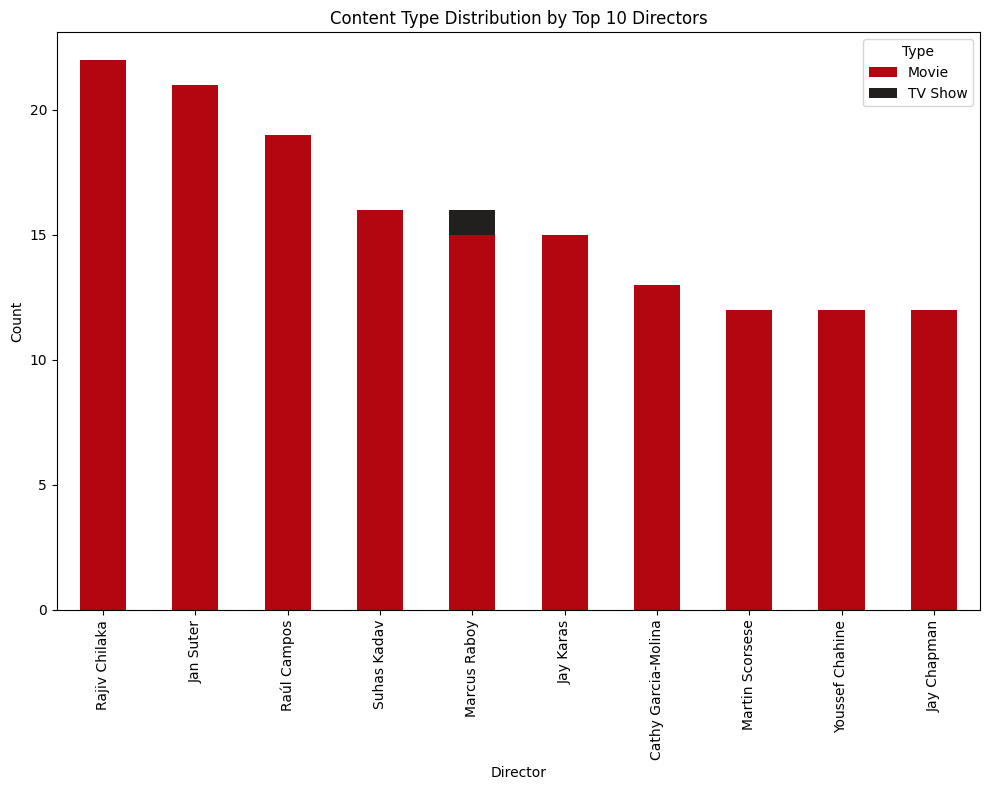

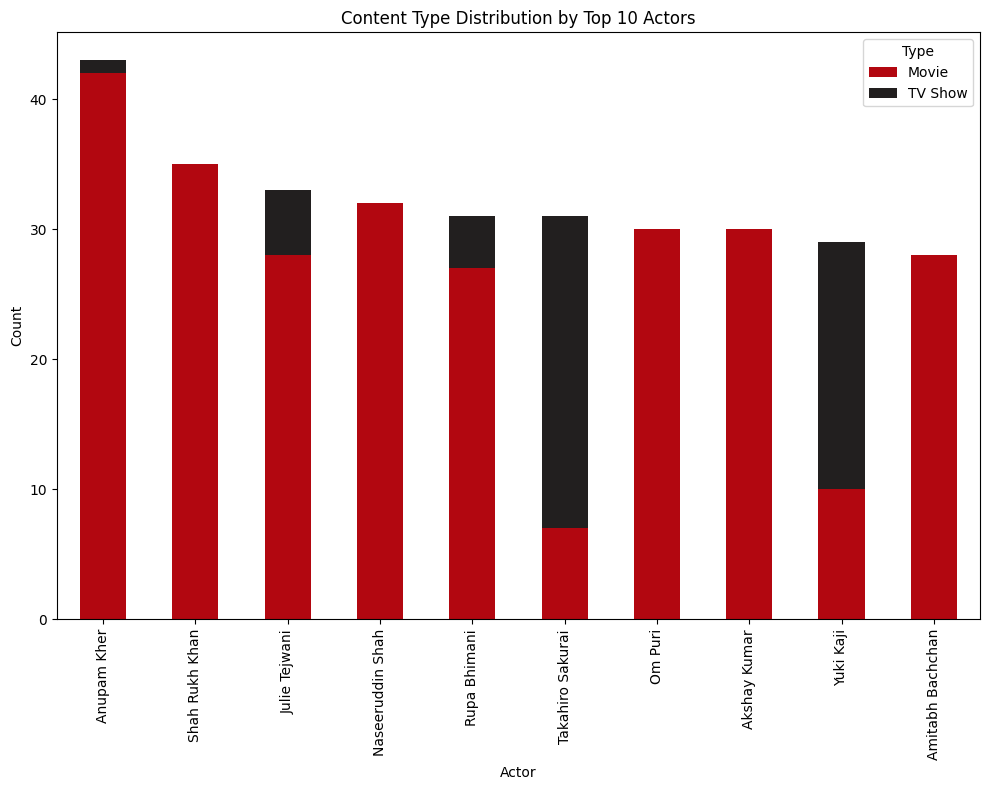

In [86]:
#Director or Actor vs. Content Type
#in the top 10 we are not adding the top most value at index 0 because of no data availbale

director_type_counts = director_df.groupby('director_list')['type'].value_counts().unstack().fillna(0)
top_directors = director_df['director_list'].value_counts().head(11).index[1:] # Exclude 'No Data' at index 0
director_type_counts_top = director_type_counts.loc[top_directors]

director_type_counts_top.plot(kind='bar', stacked=True, figsize=(10, 8), color=['#b20710','#221f1f'])
plt.title('Content Type Distribution by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

cast_type_counts = cast_df.groupby('cast_list')['type'].value_counts().unstack().fillna(0)
top_cast = cast_df['cast_list'].value_counts().head(11).index[1:] # Exclude 'No Data' at index 0
cast_type_counts_top = cast_type_counts.loc[top_cast]

cast_type_counts_top.plot(kind='bar', stacked=True, figsize=(10, 8), color=['#b20710','#221f1f'])
plt.title('Content Type Distribution by Top 10 Actors')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Director vs. Content Type:
It reveals whether the most prolific directors tend to focus more on movies or TV shows.For example, some directors might primarily direct movies, while others might have a mix or specialize in TV shows.
the most famous director is Rajiv chilaka

Actor vs. Content Type:
It shows if the most frequently appearing actors are predominantly in movies or TV shows.the most famous actor is anumpam kher.



---



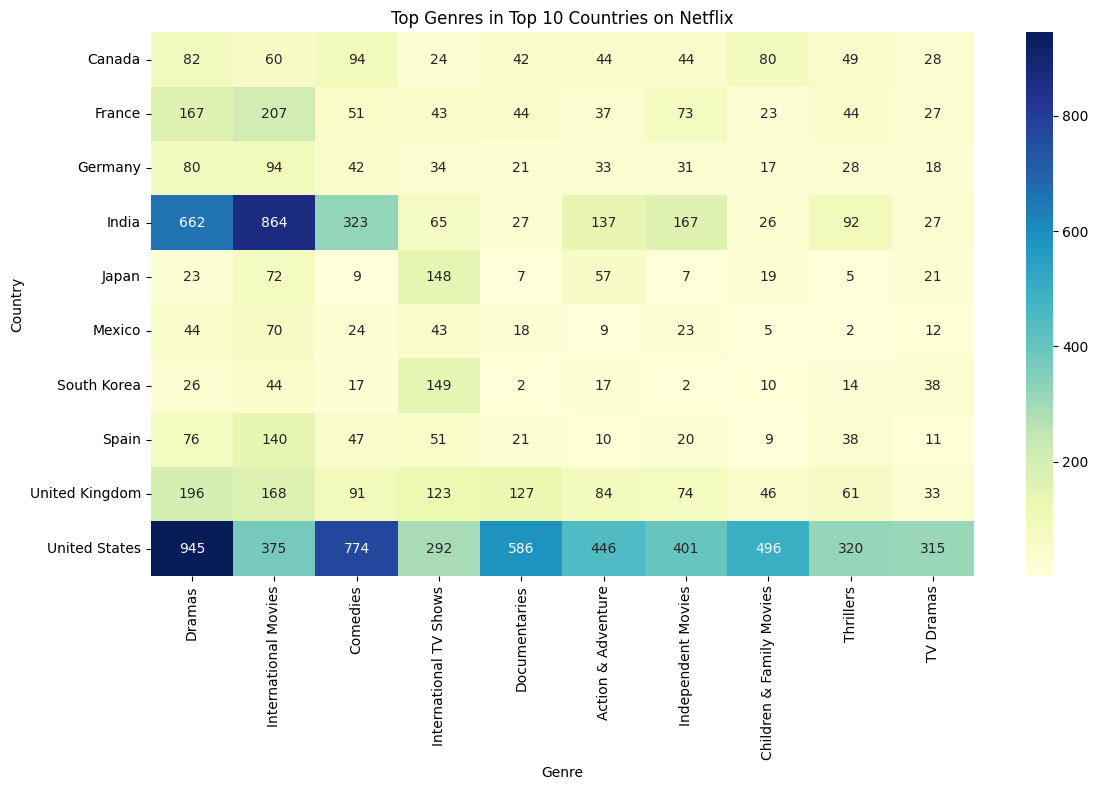

In [87]:
#bivariate analysis of genere_list  and country
genre_df = n.explode('genre_list')
genre_df = genre_df.explode('country_list')

#  Top 10 countries by number of shows
top_countries = genre_df['country_list'].value_counts().head(10).index.tolist()

#  Filter to top countries and count genres
filtered = genre_df[genre_df['country_list'].isin(top_countries)]

# Create pivot table: country vs genre
country_genre_matrix = filtered.pivot_table(index='country_list',columns='genre_list',values='show_id',aggfunc='count',fill_value=0)

# Focus on top N genres across those countries
top_genres = country_genre_matrix.sum().sort_values(ascending=False).head(10).index
heatmap_data = country_genre_matrix[top_genres]

#Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Top Genres in Top 10 Countries on Netflix")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

in the top 10 country with movies andshow the most famous genres are dramas ,international movies , comedies, international tv shows and documentaries.

**Outliers**

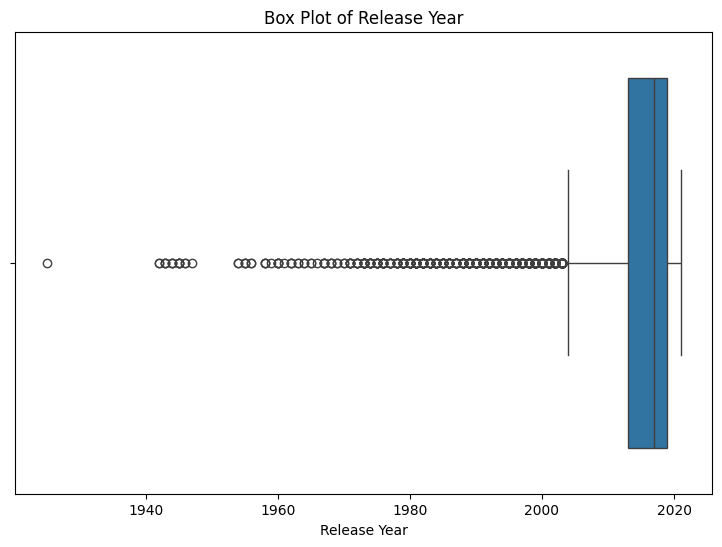

In [88]:
# For 'release_year', we can use a box plot to visualize potential outliers
plt.figure(figsize=(9, 6))
sns.boxplot(x=n['release_year'])
plt.title('Box Plot of Release Year')
plt.xlabel('Release Year')
plt.show()

the plot shows that the most of the movies/show where released between the year 2000 to 2021 and maximum movies/show between 2013 to 2020 and very few movies/show released before 1960 and 1940

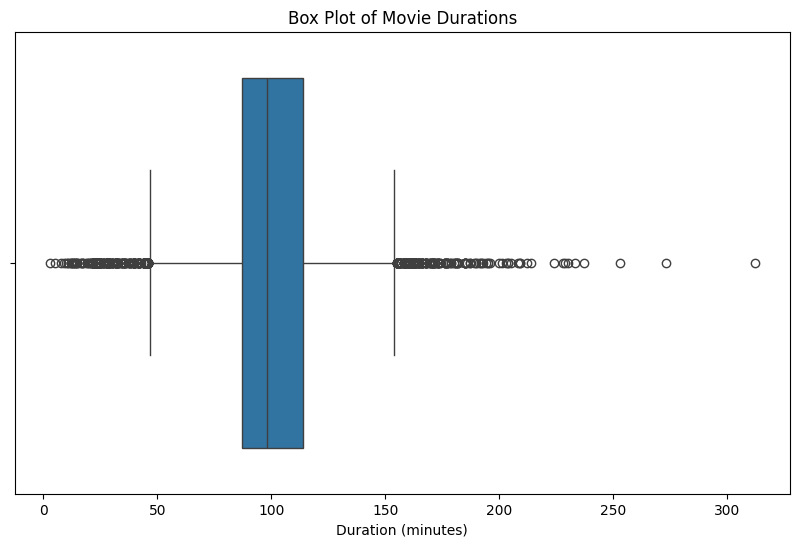

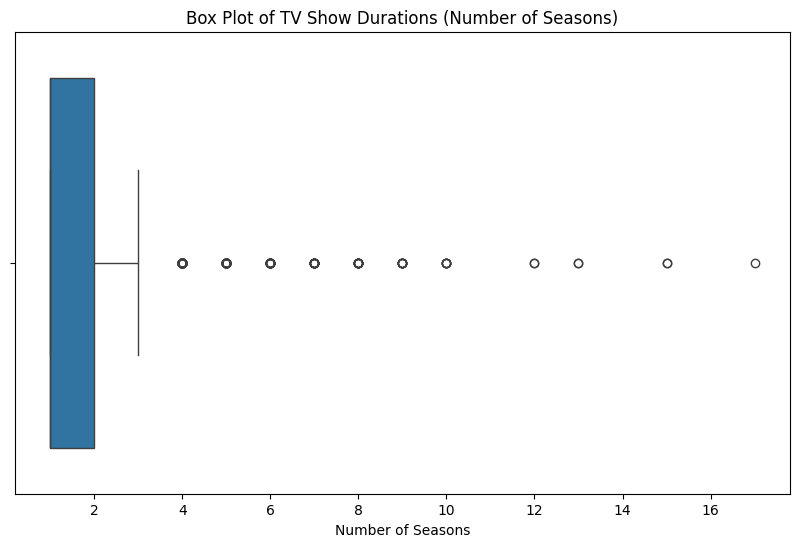

In [89]:
# For the numeric duration columns (only for movies and TV shows separately)
# Box plot for Movie Durations
plt.figure(figsize=(10, 6))
sns.boxplot(x=n_movies['duration_numeric'])
plt.title('Box Plot of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

# Box plot for TV Show Durations (number of seasons)
plt.figure(figsize=(10, 6))
sns.boxplot(x=n_tvshows['duration_numeric'])
plt.title('Box Plot of TV Show Durations (Number of Seasons)')
plt.xlabel('Number of Seasons')
plt.show()

Movies : most movies have 80 to 130 mins. time duration and few of them are more than 250 and 300 minutes.

TV shows : most of the tv shows have 1 - 3 seasons while very few have more than 12.

In [90]:
# Outliers in categorical data are often identified by examining value counts for rare occurrences.
# We've already done value counts. We can check the tail of the value counts for potential outliers
print("Value counts for 'country':")
print(n['country'].value_counts().tail())

print("\nValue counts for 'rating':")
print(n['rating'].value_counts().tail())

print("\nValue counts for 'listed_in':")
print(n['listed_in'].value_counts().tail())

# For columns like 'cast' and 'director', where there are many unique values,
# 'outliers' might be combinations that appear very rarely.
# We've already examined the most frequent ones. We could look at the least frequent,
# but in these cases, rarity is expected rather than necessarily an outlier needing removal.
print("\nValue counts for 'director':")
print(n['director'].value_counts().tail())

print("\nValue counts for 'cast':")
print(n['cast'].value_counts().tail())

Value counts for 'country':
country
Italy, Belgium                        1
United Kingdom, Hungary, Australia    1
Canada, Australia                     1
United States, South Korea, Japan     1
South Africa, Nigeria                 1
Name: count, dtype: int64

Value counts for 'rating':
rating
NC-17     3
UR        3
66 min    0
84 min    0
74 min    0
Name: count, dtype: int64

Value counts for 'listed_in':
listed_in
Classic & Cult TV, TV Sci-Fi & Fantasy                   1
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy    1
Comedies, Dramas, Sports Movies                          1
Classic Movies, Comedies, Sports Movies                  1
Children & Family Movies, Faith & Spirituality           1
Name: count, dtype: int64

Value counts for 'director':
director
Debra Granik       1
Pascale Lamche     1
Mel Stuart         1
Morgan Matthews    1
S. Shankar         1
Name: count, dtype: int64

Value counts for 'cast':
cast
Pete Davidson                                         

**Some Questins**

1 Does Netflix has more focus on TV Shows than movies in recent years

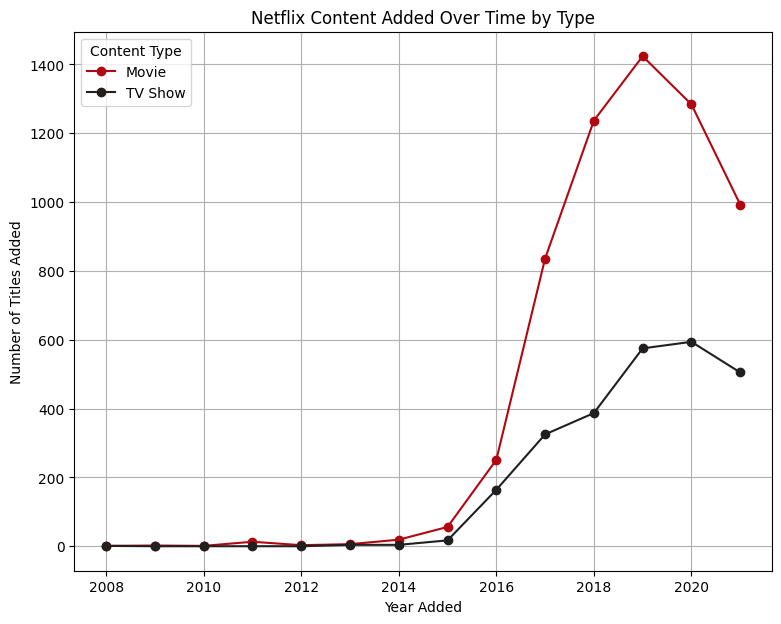

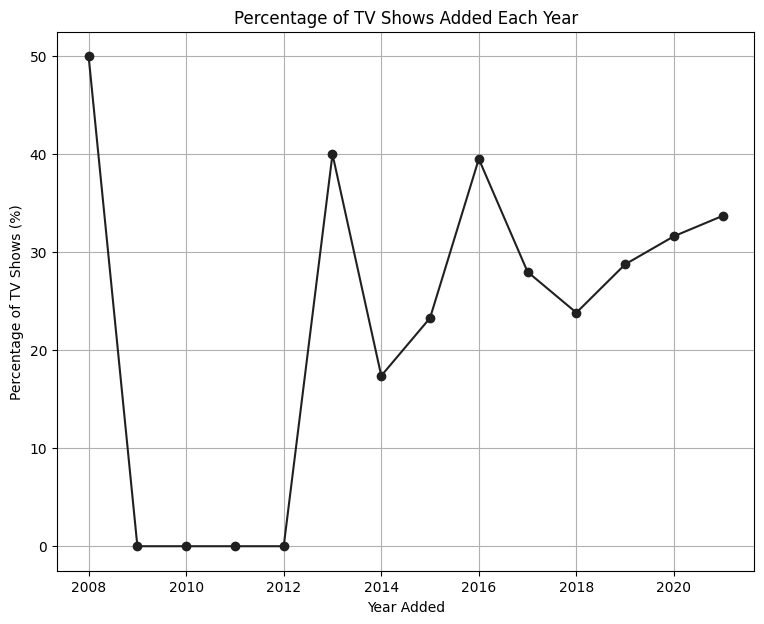

In [91]:
#  Does Netflix has more focus on TV Shows than movies in recent years
# Analyze content added over time, broken down by type
content_over_time = n.groupby('year_added')['type'].value_counts().unstack().fillna(0)

plt.figure(figsize=(9, 7))
content_over_time.plot(kind='line', marker='o', ax=plt.gca(), color=['#b20710', '#221f1f']) # Using current axes

plt.title('Netflix Content Added Over Time by Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# Calculate the percentage of TV Shows added each year
content_over_time['TV Show Percentage'] = (content_over_time['TV Show'] / (content_over_time['Movie'] + content_over_time['TV Show'])) * 100

plt.figure(figsize=(9, 7))
content_over_time['TV Show Percentage'].plot(kind='line', marker='o', color='#221f1f')
plt.title('Percentage of TV Shows Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Percentage of TV Shows (%)')
plt.grid(True)
plt.show()

The first plot shows the absolute number of Movies and TV Shows added each year.
The second plot shows the percentage of TV Shows out of the total content added each year.
By observing the trend in the second plot, we can infer whether the percentage of TV shows has been increasing in recent years compared to movies.A rising line indicates a growing focus on TV Shows relative to Movies.

2 What is the best time to launch a TV show?

/tmp/ipython-input-92-3887249507.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=monthly_addition.index, y=monthly_addition.values, hue=monthly_addition.index, color='red', legend=False)


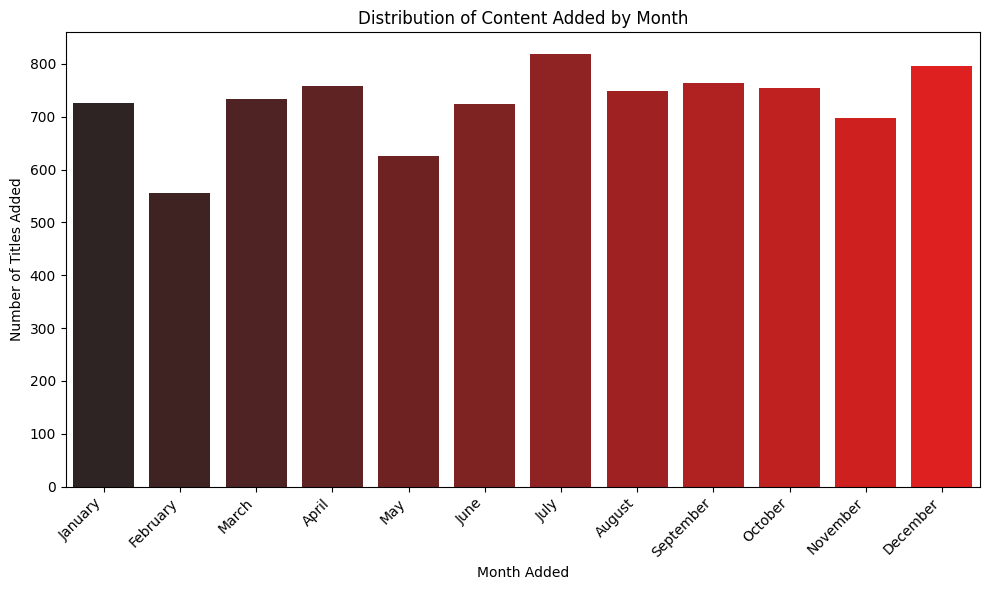

Months with the most content additions:
month_name_added
July         819
December     796
September    764
April        758
October      755
Name: count, dtype: int64


In [92]:
# Analyze the distribution of content added by month
monthly_addition = n['month_name_added'].value_counts()

# Order the months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_addition = monthly_addition.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_addition.index, y=monthly_addition.values, hue=monthly_addition.index, color='red', legend=False)
plt.title('Distribution of Content Added by Month')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Months with the most content additions:")
print(monthly_addition.nlargest(5)) # Print top 5 months

From the plot, identify the months with the highest number of content additions.
hese months could be considered the best time to launch a TV show or movie based onhistorical Netflix data.
july is the month when most of the movies/shows added to the netflix.

3 How has the number of movies released per year changed over the last 20-30 years?

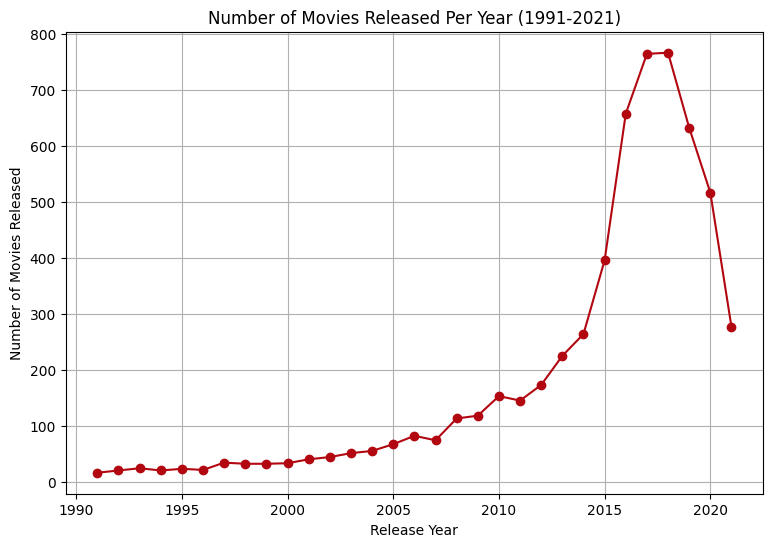

Number of movies released per year between 1991 and 2021:


,count
release_year,
1991,16
1992,20
1993,24
1994,20
1995,23
1996,21
1997,34
1998,32
1999,32


In [93]:
# How has the number of movies released per year changed over the last 20-30 years?
# Filter the dataset to include only movies
movies_df = n[n['type'] == 'Movie'].copy()

# Filter for the last 30 years (assuming current year is around 2021 based on the data)
current_year = 2021 # Based on the max release_year in the dataset
start_year = current_year - 30

recent_movies = movies_df[movies_df['release_year'] >= start_year]

# Count the number of movies released per year
movies_per_year = recent_movies['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(9, 6))
movies_per_year.plot(kind='line', marker='o', color='#b20710')
plt.title(f'Number of Movies Released Per Year ({start_year}-{current_year})')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.show()

print(f"Number of movies released per year between {start_year} and {current_year}:")
movies_per_year


in the last 20 - 30 years the no. of the movies released is incresed exponentialy specificaly after the 2010 and between year 2017-2018 more than 700 and from 2020 -2021 decreced drastcly may due to the covid pandemic.

**Analysis of actors/directors of different types of shows/movies.**

a. Top 10 directors with the most movies

/tmp/ipython-input-94-2733430340.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=movie_director_counts.index, y=movie_director_counts.values, hue=movie_director_counts.index, color='red', legend=False)


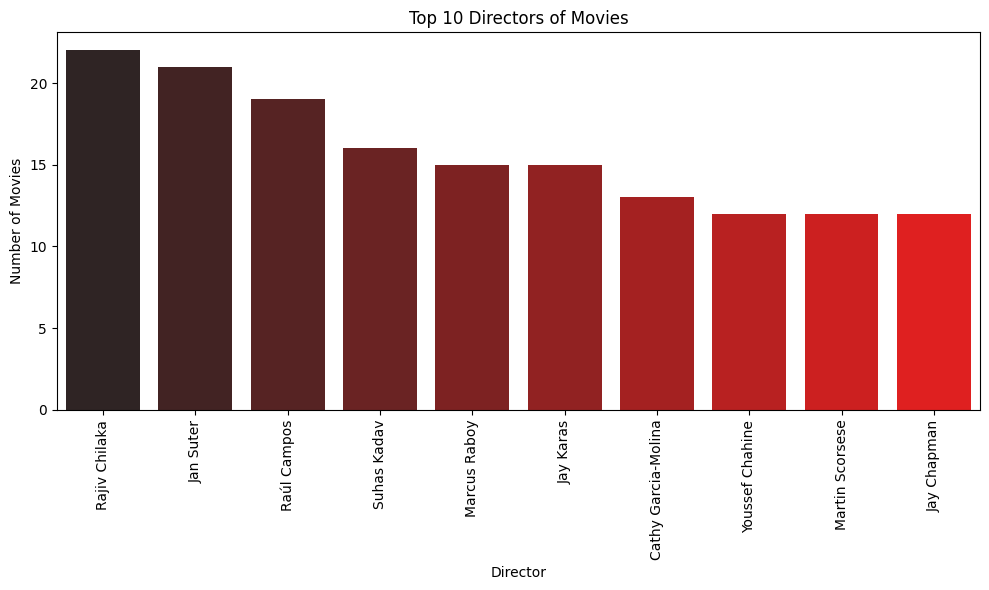

In [94]:
# Top 10 directors with the most movies
top_movie_directors = director_df[director_df['type'] == 'Movie']['director_list'].value_counts().head(11).index[1:] # Exclude 'No Data'
movie_director_counts = director_df[(director_df['type'] == 'Movie') & (director_df['director_list'].isin(top_movie_directors))]['director_list'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_director_counts.index, y=movie_director_counts.values, hue=movie_director_counts.index, color='red', legend=False)
plt.title('Top 10 Directors of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Rajiv Chilka is the most famous director in movies type

b.Top 10 directors with the most TV Shows

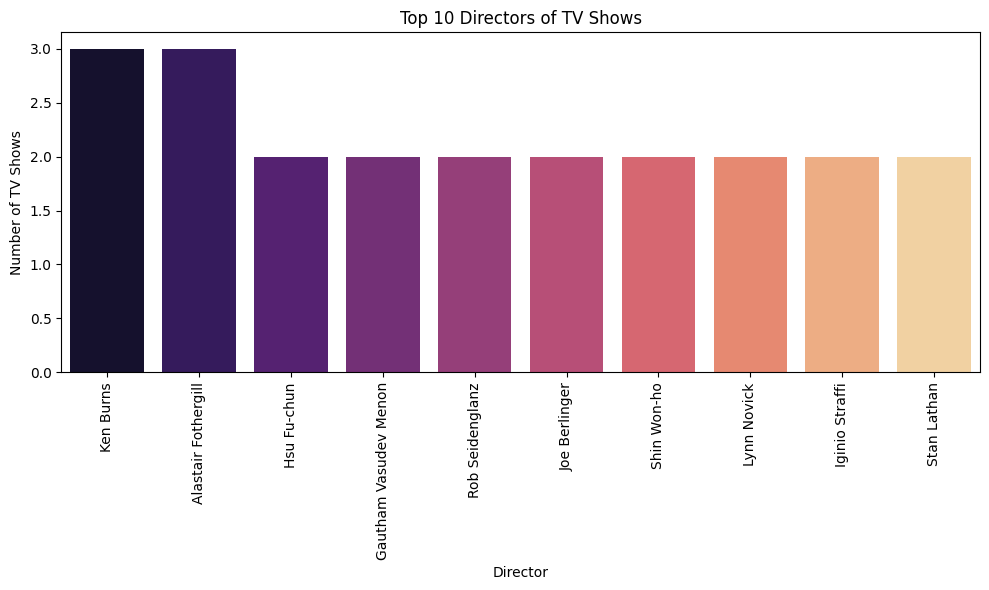

In [38]:
# Top 10 directors with the most TV Shows
top_tvshow_directors = director_df[director_df['type'] == 'TV Show']['director_list'].value_counts().head(11).index[1:] # Exclude 'No Data'
tvshow_director_counts = director_df[(director_df['type'] == 'TV Show') & (director_df['director_list'].isin(top_tvshow_directors))]['director_list'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=tvshow_director_counts.index, y=tvshow_director_counts.values, hue=tvshow_director_counts.index, palette='magma', legend=False)
plt.title('Top 10 Directors of TV Shows')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ken burns and alastair fothergill are the famous directos in TV show type

c. Top 10 actors in movies

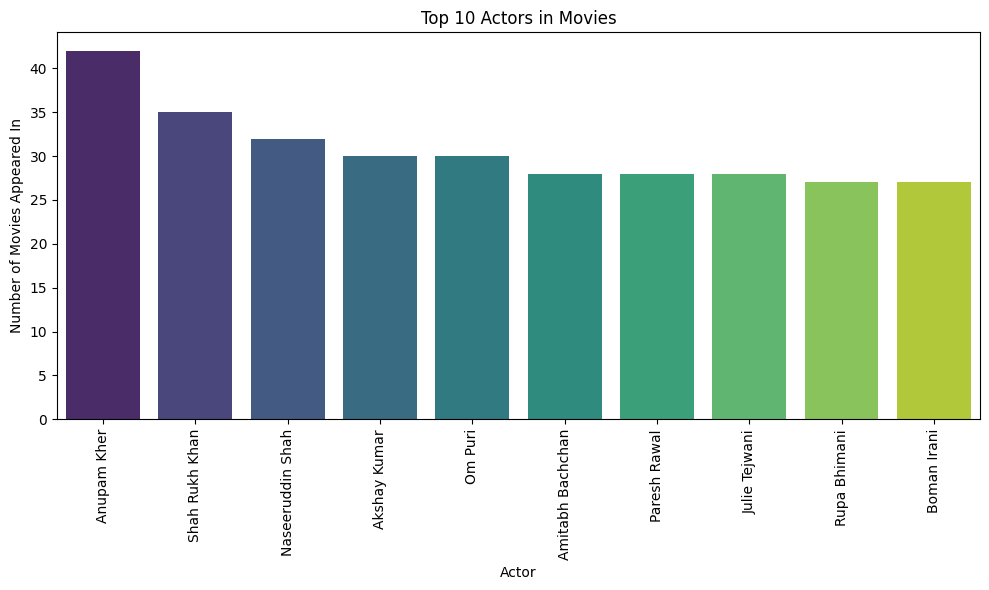

In [39]:
# Top 10 actors in movies
top_movie_cast = cast_df[cast_df['type'] == 'Movie']['cast_list'].value_counts().head(11).index[1:] # Exclude 'No Data'
movie_cast_counts = cast_df[(cast_df['type'] == 'Movie') & (cast_df['cast_list'].isin(top_movie_cast))]['cast_list'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_cast_counts.index, y=movie_cast_counts.values, hue=movie_cast_counts.index, palette='viridis', legend=False)
plt.title('Top 10 Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies Appeared In')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Anupam kher is the most famous acto in movies type followed by shshrukh khan.

d. Top 10 actors in TV Shows

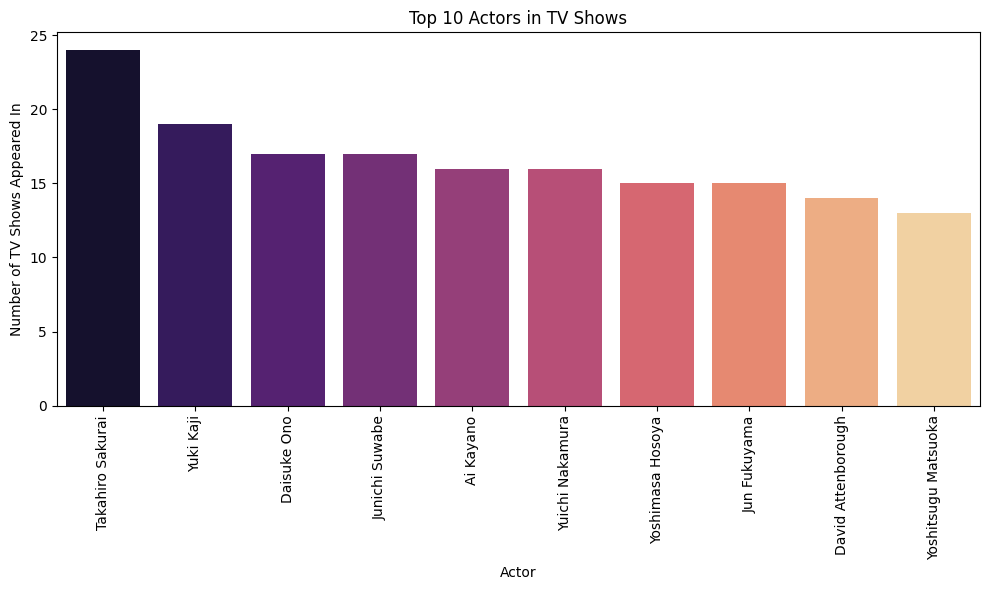

In [40]:
# Top 10 actors in TV Shows
top_tvshow_cast = cast_df[cast_df['type'] == 'TV Show']['cast_list'].value_counts().head(11).index[1:] # Exclude 'No Data'
tvshow_cast_counts = cast_df[(cast_df['type'] == 'TV Show') & (cast_df['cast_list'].isin(top_tvshow_cast))]['cast_list'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=tvshow_cast_counts.index, y=tvshow_cast_counts.values, hue=tvshow_cast_counts.index, palette='magma', legend=False)
plt.title('Top 10 Actors in TV Shows')
plt.xlabel('Actor')
plt.ylabel('Number of TV Shows Appeared In')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Takahiro Sakurai is the famous actor in the TV shows type.

**Business Insights :**

Overview :  
The whoe data set contains the movies/show which are released between 1925 - 2021 in different contry with various gnres, and dates of it when they are added to the netflix.

Content Type : While movies constitute a larger portion of the overall library, the percentage of TV shows added each year has been increasing in recent years, suggesting a growing focus on series.

Geographical Market Focus:

**United States Dominance:** The US is by far the largest market in terms of content volume. This signifies the importance of the US audience and the significant production and acquisition efforts in this region.

**Growing importance of India:** India is the second-largest country in terms of content volume and shows a significant increase in content addition over time. This highlights India as a crucial growth market for Netflix.

**Asian Market for TV Shows:** Japan and South Korea show a higher proportion of TV shows compared to movies, suggesting a strong preference or focus on TV series in these markets.

Production and Acquisition Strategy:

*   **Prolific Years for Content Addition:** The years between 2014 and 2019 saw the highest volume of content added to Netflix, with 2019 being the peak year. This period likely reflects a phase of aggressive expansion and content acquisition.
*   **Impact of Release Year:** The majority of content released on Netflix was produced in recent years (post-2013), indicating a focus on newer releases. However, there's also a presence of older content, suggesting a strategy to offer a diverse library.

*   **Rating Distribution:** TV-MA and TV-14 are the most common ratings, indicating a significant amount of content targeted towards mature or teen audiences.

*   **Popular Content Lengths:** Movies typically have a duration between 80 and 130 minutes. TV shows are predominantly single-season, followed by 2 and 3 seasons. This provides guidance on optimal content lengths for production.

*   **Genre Popularity:** "Dramas," "International Movies," and "Comedies" are the most frequent genres overall. "International TV Shows" and "TV Dramas" are prominent among TV show genres.
*   **Rating Distribution:** TV-MA and TV-14 are the most common ratings, indicating a significant amount of content targeted towards mature or teen audiences.


**Talent and Industry Trends:**

*   **Key Directors and Actors:** The analysis identifies key directors (like Rajiv Chilka for movies and Ken Burns for TV shows) and actors (like Anupam Kher for movies and Takahiro Sakurai for TV shows) who have contributed significantly to the Netflix library. Collaborating with such popular talent could be beneficial.

**Release Timing:**

*   **Peak Months for Content Addition:** July, August, and December are the months when most content is added to Netflix. This could be a strategic timing for launching new shows or movies to capitalize on audience availability (e.g., summer vacations, holiday season).

 **Market Prioritization:** Netflix heavily prioritizes the US market, but the significant growth in content from India suggests a strong focus on expanding its footprint and appealing to the Indian audience. The data also hints at market-specific content strategies, like the higher proportion of TV shows in Japan and South Korea.
*   **Aggressive Expansion Strategy:** The peak years of content addition (2014-2019) indicate a deliberate strategy to rapidly build a comprehensive content library to attract and retain subscribers.
*   **Balancing Library Depth and Breadth:** While focusing on newer releases, the presence of older content suggests an effort to provide a diverse catalog that caters to various tastes and nostalgia.
*   **Optimal Content Formats:** The prevalence of movies within a specific duration range and single-season TV shows provides valuable information for production and acquisition decisions regarding content length.
*   **Leveraging Star Power:** Identifying and collaborating with popular directors and actors is a viable strategy to attract viewership and generate buzz around new releases.
*   **Strategic Release Timing:** Launching new content, especially TV shows, during months with historical peaks in content additions (July, August, December) could be a strategic move to maximize initial viewership and capitalize on audience availability during holiday periods or summer breaks.
*   **Content Tailoring:** Understanding the popular genres in different countries and for different content types allows Netflix to tailor its production and acquisition strategies to better serve local tastes and preferences. For example, investing in more International TV Shows for the Japanese and South Korean markets seems like a sound strategy based on the data.
*   **Audience Segmentation:** The distribution of content across different ratings indicates the target demographics Netflix is primarily catering to, while still maintaining some content for other age groups. This informs content development and marketing efforts.

In summary, the analysis reveals that Netflix has been strategically expanding its content library, with a strong focus on key markets like the US and increasingly India. They are actively adding content, balancing movie and TV show offerings, and appear to be using insights about popular genres, ratings, and talent to inform their production and acquisition decisions. The observed seasonal trends in content addition also suggest a tactical approach to releasing new content. These insights can be used to refine content strategy, allocate resources effectively, and further drive subscriber growth and engagement in different regions.

**Recommendations :**

1.Focus on High-Performing Content Types
 Make more TV Shows than Movies — especially since shows are gaining popularity year after year.

Prioritize content in "Dramas," "Comedies," "International Movies," "International TV Shows," and "TV Dramas" — these genres attract the most viewers.

Keep creating content for teen and mature audiences (TV-MA, TV-14), as they form the bulk of current offerings and likely viewership.

2.Localize for Country-Specific Growth
Make more TV Shows for India, Japan, and South Korea — these countries consume and produce high volumes of shows.

Add genre variety in countries with limited options like South Africa, Turkey, and Mexico to attract new subscribers.

Promote top genres differently by country, e.g., thrillers in South Korea, docuseries in the US, romance in India.

3.Use Optimal Timing for Content Releases
Plan big content drops in July, August, and December — these months see peak new additions, possibly due to vacations and holidays.

 Launch major TV shows between July and September for maximum reach and retention.

4.Produce Movies in Ideal Duration Range
Aim for movies between 80 and 130 minutes, as most Netflix films fall into this preferred watch-time bracket.

5 Partner With Recognizable Talent
 Work with popular actors and directors (e.g., Anupam Kher, Rajiv Chilka) to create buzz and build trust with viewers.

Use historical data to identify top creators by genre and collaborate with them regularly.

6.Improve Data Quality for Better Insights
 A significant number of records are missing director, cast, or country details — label unknowns or enhance metadata collection.

 7.Focus on Localized Content in Emerging Markets
Countries like India, Brazil, and South Korea are producing more content and watching more shows.

Invest in regional languages and local themes to boost subscriptions in these regions.

8.Improve Metadata Collection for Future Strategy
Many shows are missing cast, director, or country information.
Better data helps make better business decisions and personalized recommendations.

 9.Boost Mobile-Friendly Content for Emerging Markets
Focus on producing shorter episodes or mini-series (5–25 mins per episode) that are ideal for mobile viewing — especially in countries like India, Indonesia, and Nigeria where mobile streaming is dominant.

10.Leverage Data to Personalize Genre Recommendations
Use viewing trends by country, season, and genre to personalize content suggestions — for example, promote romantic comedies during Valentine's month or horror content during Halloween season to increase user engagement and watch time.